# Flip angle map standard deviation

## Python standard libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

## Read rawdata

In [2]:
# transversal:
fa_stack_spir = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_spir.npy')
fa_stack_cart = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_cart.npy')
fa_std_spir_tra = fa_stack_spir.std(axis=3)
fa_std_cart_tra = fa_stack_cart.std(axis=3)
for slc in range(fa_std_cart_tra.shape[2]):
    fa_std_cart_tra[:,:,slc] = np.fliplr(ndimage.rotate(fa_std_cart_tra[:,:,slc],90))

# sagittal:
fa_stack_spir = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_spir.npy')
fa_stack_cart = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_cart.npy')
fa_std_spir_sag = fa_stack_spir.std(axis=3)
fa_std_cart_sag = fa_stack_cart.std(axis=3)

for slc in range(fa_std_cart_sag.shape[2]):
    fa_std_cart_sag[slc,:,:] = ndimage.rotate(fa_std_cart_sag[slc,:,:],90)
fa_std_spir_sag = np.transpose(fa_std_spir_sag,axes=[1,0,2])
fa_std_spir_sag = np.flip(fa_std_spir_sag, axis=0)
for slc in range(fa_std_spir_sag.shape[2]):
    fa_std_spir_sag[slc,:,:] = np.fliplr(ndimage.rotate(fa_std_spir_sag[slc,:,:],90))

# coronal:
fa_stack_spir = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_spir.npy')
fa_stack_cart = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_cart.npy')
fa_std_spir_cor = fa_stack_spir.std(axis=3)
fa_std_cart_cor = fa_stack_cart.std(axis=3)

for slc in range(fa_std_cart_cor.shape[2]):
    fa_std_cart_cor[:,slc,:] = ndimage.rotate(fa_std_cart_cor[:,slc,:],90)
fa_std_spir_cor = np.transpose(fa_std_spir_cor,axes=[1,0,2])
fa_std_spir_cor = np.flip(fa_std_spir_cor, axis=1)
for slc in range(fa_std_spir_cor.shape[2]):
    fa_std_spir_cor[:,slc,:] = np.fliplr(ndimage.rotate(fa_std_spir_cor[:,slc,:],90))

## Plotting

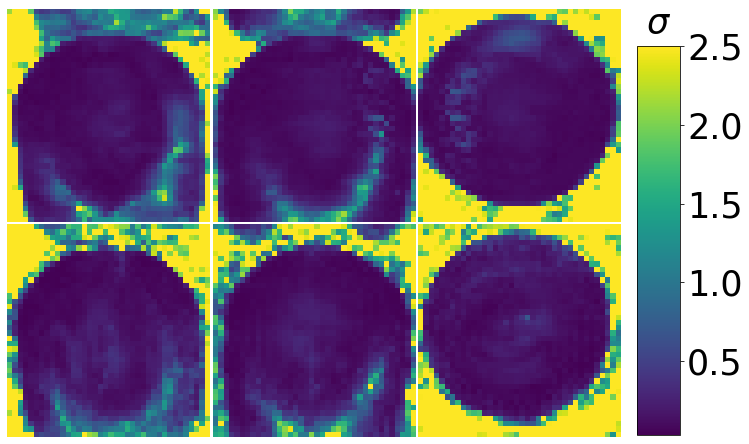

In [3]:
fig=plt.figure(figsize=(10, 6))
slc1 = 19

plt.subplot(2,3,1)
im = plt.imshow(fa_std_cart_sag[slc1,:,2:],vmax=2.5)
plt.axis('off')
plt.tight_layout(pad=0.2)

plt.subplot(2,3,2)
im = plt.imshow(fa_std_cart_cor[:,slc1,:-2],vmax=2.5)
plt.axis('off')
plt.tight_layout(pad=0.2)

plt.subplot(2,3,3)
im = plt.imshow(fa_std_cart_tra[:,2:,slc1],vmax=2.5)
plt.axis('off')
plt.tight_layout(pad=0.2)

plt.subplot(2,3,4)
im = plt.imshow(fa_std_spir_sag[slc1,:,2:],vmax=2.5)
plt.axis('off')
plt.tight_layout(pad=0.2)

plt.subplot(2,3,5)
im = plt.imshow(fa_std_spir_cor[:,slc1,:-2],vmax=2.5)
plt.axis('off')
#plt.tight_layout(pad=0.2)

plt.subplot(2,3,6)
im = plt.imshow(fa_std_spir_tra[:,2:,slc1],vmax=2.5)
plt.axis('off')
plt.tight_layout(pad=0.2)

fig.subplots_adjust(right=0.9);
cbar_ax = fig.add_axes([0.9, 0.009, 0.06, 0.9]); #[left, bottom, width, height]
cbar_ax.set_title(r'$\sigma$', pad=12, fontsize=35);
cbar_ax.tick_params(labelsize=35)
c= fig.colorbar(im, cax=cbar_ax);

## Mean of standard deviation in the 3D volume

In [4]:
fa_stack_spir = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_spir.npy')
fa_stack_cart = np.load('/home/niesens/Documents/RawData/20210720/fa_stack_cart.npy')
fa_std_spir_tra = fa_stack_spir.std(axis=3)
fa_std_cart_tra = fa_stack_cart.std(axis=3)

for slc in range(fa_std_cart_tra.shape[2]):
    fa_std_cart_tra[:,:,slc] = np.fliplr(ndimage.rotate(fa_std_cart_tra[:,:,slc],90))

slices = 18
slice_first = 8
slice_last = 25
fa_std_cart_tra = fa_std_cart_tra[5:32,5:32,slice_first:slice_last+1]
fa_std_spir_tra = fa_std_spir_tra[5:32,5:32,slice_first:slice_last+1]

print('Cart: {}'.format(fa_std_cart_tra.mean()))
print('Spir: {}'.format(fa_std_spir_tra.mean()))

Cart: 0.25077121703749866
Spir: 0.2836548622079905
